**KHAI BÁO THƯ VIỆN**

In [1]:
import numpy as np
import pandas as pd
#import os
import matplotlib.pyplot as plt
#import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model


**Mount với drive**



In [2]:

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


**CHIA TẬP DỮ LIỆU THÀNH TẬP TRAIN, TEST VÀ VALIDATION**


In [3]:
TRAIN_PATH='/content/drive/MyDrive/DỮ LIỆU_PROJECT_AI_CUỐI_KÌ_official/DATASETS_project_AI_cuối_kì/DATASETS_project_AI_cuối_kì/train_rice-leaf-disease'
TEST_PATH='/content/drive/MyDrive/DỮ LIỆU_PROJECT_AI_CUỐI_KÌ_official/DATASETS_project_AI_cuối_kì/DATASETS_project_AI_cuối_kì/test_rice-leaf-disease'
IMAGE_SIZE=(64,64)
BATCH_SIZE=128 #128 bo loc
VALIDATE_PATH='/content/drive/MyDrive/DỮ LIỆU_PROJECT_AI_CUỐI_KÌ_official/DATASETS_project_AI_cuối_kì/DATASETS_project_AI_cuối_kì/valid_rice-leaf-disease'
class_count=4

**XỬ LÍ DỮ LIỆU BẰNG CÁCH RESCALE, XOAY, PHÓNG TO,..**

In [4]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

validate_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

train_data = train_generator.flow_from_directory(TRAIN_PATH, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)
validate_data = validate_generator.flow_from_directory(VALIDATE_PATH, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE)
test_data = test_generator.flow_from_directory(TEST_PATH, target_size=IMAGE_SIZE)

Found 3172 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


**GẮN NHÃN PHÂN LỚP CHO DỮ LIỆU**

In [5]:
classes=list(train_data.class_indices.keys())
print(f'classes:{classes} \r')
class_indices=list(train_data.class_indices.values())
print(f'class_indices:{class_indices}')
labels=test_data.labels
print(f'label :{labels}')

classes:['bacterial', 'brown spot', 'healthy', 'leaf smut'] 
class_indices:[0, 1, 2, 3]
label :[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3]


**CREATE MODEL BẰNG CNN VÀ BIÊN DỊCH MODEL**

In [6]:

model = Sequential()

## Layer 1
model.add(Conv2D(128, kernel_size = (3, 3), activation = "relu", 
                    kernel_initializer = "he_uniform", padding = "valid", input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size = (3, 3), ))
model.add(BatchNormalization())

## Layer 2
model.add(Conv2D(256, padding = "same", kernel_size = (5, 5), activation = "relu", 
                    kernel_initializer = "he_uniform"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(BatchNormalization())

## Layer 3
model.add(Conv2D(384, kernel_size = (3, 3), activation = "relu", kernel_initializer = "he_uniform", 
                    padding = "same"))
model.add(BatchNormalization())

## Layer 5 
model.add(Conv2D(512, kernel_size = (3, 3), activation = "relu", kernel_initializer = "he_uniform", 
                    padding = "same"))
model.add(BatchNormalization())

## Layer 6 
model.add(Conv2D(256, kernel_size = (3, 3), activation = "relu", kernel_initializer = "he_uniform", 
                    padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), ))


## Flatten the Model and Connect it 
# To Connected Layer 
model.add(Flatten())
model.add(Dense(2048, activation = "relu", kernel_initializer = "he_uniform"))
model.add(Dropout(0.3))

## Dense 2 
model.add(Dense(1024, kernel_initializer = "he_uniform", activation = "relu"))
model.add(Dropout(0.3))
model.add(BatchNormalization())

## Dense 3 
model.add(Dense(512, kernel_initializer = "he_uniform", activation = "relu"))
model.add(Dropout(0.3))
model.add(BatchNormalization())
## Dense 4
model.add(Dense(256, kernel_initializer = "he_uniform", activation = "relu"))
model.add(Dropout(0.3))
model.add(BatchNormalization())

## Output Layer
model.add(Dense(4, activation = "softmax"))

#Compile Model and Get the Summary 
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 20, 20, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                        

**TRAIN MODEL ĐÃ TẠO VỚI 150 LẦN**

In [7]:
# train the model
epochs=150
history = model.fit(train_data,batch_size=65,epochs=epochs,validation_data=validate_data,verbose=1,shuffle=True)

Epoch 1/150
25/25 [==============================] - 854s 34s/step - loss: 0.5726 - accuracy: 0.7689 - val_loss: 331.9978 - val_accuracy: 0.2500
Epoch 2/150
25/25 [==============================] - 9s 374ms/step - loss: 0.0979 - accuracy: 0.9672 - val_loss: 148.6738 - val_accuracy: 0.2500
Epoch 3/150
25/25 [==============================] - 9s 376ms/step - loss: 0.0424 - accuracy: 0.9871 - val_loss: 60.2364 - val_accuracy: 0.2500
Epoch 4/150
25/25 [==============================] - 10s 387ms/step - loss: 0.0221 - accuracy: 0.9918 - val_loss: 25.4681 - val_accuracy: 0.2500
Epoch 5/150
25/25 [==============================] - 10s 392ms/step - loss: 0.0233 - accuracy: 0.9909 - val_loss: 11.7333 - val_accuracy: 0.2562
Epoch 6/150
25/25 [==============================] - 10s 380ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 12.2271 - val_accuracy: 0.2612
Epoch 7/150
25/25 [==============================] - 9s 376ms/step - loss: 0.0262 - accuracy: 0.9902 - val_loss: 1.6154 - val_accur

**KIỂM ĐỊNH ĐỘ CHÍNH XÁC TRONG KHI TRAIN**

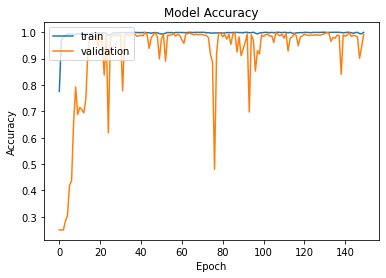

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

# print(history.history.keys())
## Plot Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc = "upper left")
plt.savefig("accuracy.png", dpi = 300)
plt.show()

 **KIỂM ĐỊNH ĐỘ MẤT MÁT TRONG KHI TRAIN**

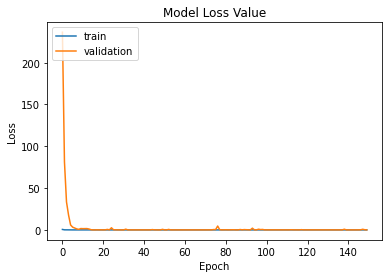

In [ ]:
## Plot Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss Value")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc = "upper left")
plt.savefig("loss.png", dpi = 300)
plt.show()

**SAVE FILE WEIGHT**

In [8]:
#Saving the  model 
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
  json_file.write(fer_json)  
model.save_weights("weight.h5")  

**SAVE MODEL SAU KHI TRAIN XONG**




In [9]:
model.save('disease.h5')

**ĐƯA LÁ LÚA BỊ BỆNH LEAF SMUT VÀO ĐỂ TEST MODEL**

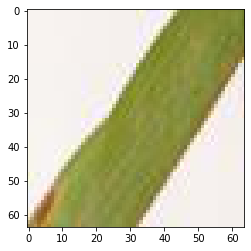

Leaf smut


In [12]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
filename = "/content/drive/MyDrive/DỮ LIỆU_PROJECT_AI_CUỐI_KÌ_official/DATASETS_project_AI_cuối_kì/DATASETS_project_AI_cuối_kì/test_rice-leaf-disease/Leaf smut/Leaf_smut_original_DSC_0314.JPG_b52b3dea-991d-4b25-bf4f-5b94813a0c40.JPG"

img = load_img(filename,target_size=(64,64))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("bacterial leaf blight")
if(kq==1):
    print("brown spot")
if(kq==2):
    print("Healthy")
if(kq==3):
    print("Leaf smut")

**ĐƯA LÁ LÚA KHOẺ MẠNH VÀO ĐỂ TEST MODEL**

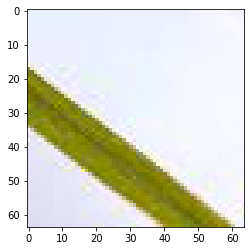

Healthy


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
filename = "/content/drive/MyDrive/DỮ LIỆU_PROJECT_AI_CUỐI_KÌ_official/DATASETS_project_AI_cuối_kì/DATASETS_project_AI_cuối_kì/test_rice-leaf-disease/Health/Health_original_IMG_20190419_095646.jpg_ec0f6869-539f-4048-8b68-7ea7824723a5.jpg"

img = load_img(filename,target_size=(64,64))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("bacterial leaf blight")
if(kq==1):
    print("brown spot")
if(kq==2):
    print("Healthy")
if(kq==3):
    print("Leaf smut")

**ĐƯA LÁ LÚA BỊ BỆNH BROWN SPOT VÀO ĐỂ TEST MODEL**

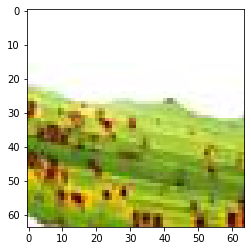

brown spot


In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
filename = "/content/drive/MyDrive/DỮ LIỆU_PROJECT_AI_CUỐI_KÌ_official/DATASETS_project_AI_cuối_kì/DATASETS_project_AI_cuối_kì/test_rice-leaf-disease/Brown spot/Brown_spot_original_DSC_0100.jpg_0cd8a7b9-d04a-4e70-898f-3a278e868835.jpg"

img = load_img(filename,target_size=(64,64))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("bacterial leaf blight")
if(kq==1):
    print("brown spot")
if(kq==2):
    print("Healthy")
if(kq==3):
    print("Leaf smut")

**ĐƯA BỆNH BACTERIAL LEAF BRIGHT VÀO ĐỂ TEST MODEL**

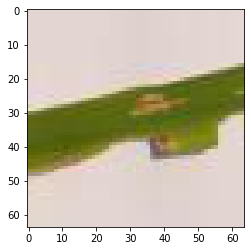

bacterial leaf blight


In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
filename = "/content/drive/MyDrive/DỮ LIỆU_PROJECT_AI_CUỐI_KÌ_official/DATASETS_project_AI_cuối_kì/DATASETS_project_AI_cuối_kì/test_rice-leaf-disease/Bacterial leaf blight/Bacterial_leaf_blight_original_DSC_0365.JPG_0fb201f3-4ea3-4f93-b143-223e34d2d3f9.JPG"

img = load_img(filename,target_size=(64,64))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,64,64,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("bacterial leaf blight")
if(kq==1):
    print("brown spot")
if(kq==2):
    print("Healthy")
if(kq==3):
    print("Leaf smut")